<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  MENTAL HEALTH DATA ANALYSIS
</div>

<center>
  <h3 style="font-weight: bold; color: #6A5ACD;">Mental Health Classification using Machine Learning: A Predictive Approach</h3>
</center>

<img src="Mental Health Image.avif" width="900" height="600" style="display: block; margin: auto;">

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Introduction
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Overview :</h3>

This dataset contains responses collected from a mental health survey conducted among employees working in the tech industry. The data aims to shed light on how mental health is perceived, addressed, and supported in various workplace environments. It includes a variety of demographic, professional, and mental health-related attributes.

<h3 style="font-weight: bold; color: #6A5ACD;">About the Dataset :</h3>

This dataset is a collection of responses from individuals—both students and working professionals—about their lifestyle, stress levels, academic/work pressures, and mental health conditions, especially focusing on depression and related factors.

<h3 style="font-weight: bold; color: #6A5ACD;">Feature Description :</h3>

<table border="1" style="border-collapse: collapse; width: 100%;">
    <tr>
        <th>Column Name</th>
        <th>Description</th>
    </tr>
    <tr><td><b>id</b></td><td>Unique identifier for each respondent.</td></tr>
    <tr><td><b>Name</b></td><td>First name (not very useful analytically).</td></tr>
    <tr><td><b>Gender</b></td><td>Respondent's gender.</td></tr>
    <tr><td><b>Age</b></td><td>Age of the respondent.</td></tr>
    <tr><td><b>City</b></td><td>City of residence.</td></tr>
    <tr><td><b>Working Professional or Student</b></td><td>Whether the respondent is a student or a professional.</td></tr>
    <tr><td><b>Profession</b></td><td>Specific job title or field of study.</td></tr>
    <tr><td><b>Academic Pressure</b></td><td>Level of academic stress (mostly for students).</td></tr>
    <tr><td><b>Work Pressure</b></td><td>Level of stress at work (mostly for professionals).</td></tr>
    <tr><td><b>CGPA</b></td><td>Academic performance (for students).</td></tr>
    <tr><td><b>Study Satisfaction</b></td><td>Self-reported satisfaction with studies.</td></tr>
    <tr><td><b>Job Satisfaction</b></td><td>Self-reported satisfaction with job role.</td></tr>
    <tr><td><b>Sleep Duration</b></td><td>Average daily sleep duration.</td></tr>
    <tr><td><b>Dietary Habits</b></td><td>Healthy, moderate, or unhealthy eating habits.</td></tr>
    <tr><td><b>Degree</b></td><td>Educational qualification.</td></tr>
    <tr><td><b>Have you ever had suicidal thoughts?</b></td><td>Yes/No response indicating mental distress.</td></tr>
    <tr><td><b>Work/Study Hours</b></td><td>Average hours spent working or studying daily.</td></tr>
    <tr><td><b>Financial Stress</b></td><td>Level of financial pressure experienced.</td></tr>
    <tr><td><b>Family History of Mental Illness</b></td><td>Whether there’s a known family history of mental illness.</td></tr>
    <tr><td><b>Depression</b></td><td>Binary label indicating if the respondent is experiencing depression.</td></tr>
</table>

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Import Required Dependencies
</div>

In [28]:
# Numerical operations and calculations
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization and plotting
import matplotlib.pyplot as plt

# Enhanced data visualization and statistical graphics
import seaborn as sns

# Ignores warning messages.
import warnings
warnings.filterwarnings('ignore')

In [30]:
# For encoding
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

In [32]:
# To split the data into train and test
from sklearn.model_selection import train_test_split

In [34]:
# Loading classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB

In [36]:
# Loading classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [38]:
# Loading hyperparameter tuning models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Data Loading
</div>

In [41]:
mental_data = pd.read_csv('./Mental Health Data.csv')

In [42]:
mental_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Descriptive Analysis
</div>

In [46]:
mental_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [48]:
mental_data.tail()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [50]:
mental_data.sample(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
104739,104739,Ira,Female,30.0,Lucknow,Student,NaN,5.0,NaN,7.88,4.0,NaN,More than 8 hours,Moderate,M.Ed,Yes,8.0,5.0,Yes,1
135195,135195,Siddharth,Male,40.0,Jaipur,Working Professional,Judge,NaN,5.0,NaN,NaN,1.0,More than 8 hours,Healthy,LLB,Yes,9.0,5.0,No,1
20630,20630,Aadhya,Female,23.0,Srinagar,Student,NaN,1.0,NaN,9.72,4.0,NaN,Less than 5 hours,Unhealthy,BHM,No,8.0,1.0,Yes,0
56018,56018,Vivaan,Male,23.0,Bangalore,Working Professional,Graphic Designer,NaN,5.0,NaN,NaN,4.0,More than 8 hours,Unhealthy,B.Tech,Yes,1.0,4.0,No,1
37271,37271,Mukund,Male,18.0,Lucknow,Student,NaN,5.0,NaN,7.77,5.0,NaN,5-6 hours,Moderate,Class 12,Yes,7.0,1.0,No,1
63110,63110,Veda,Female,47.0,Nashik,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,5-6 hours,Moderate,M.Ed,Yes,1.0,1.0,Yes,0
106877,106877,Samar,Male,33.0,Pune,Student,NaN,1.0,NaN,6.53,4.0,NaN,Less than 5 hours,Moderate,B.Pharm,Yes,12.0,3.0,No,1
888,888,Neha,Female,57.0,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,3.0,5-6 hours,Healthy,LLM,Yes,9.0,5.0,No,0
51844,51844,Kunal,Male,56.0,Ahmedabad,Working Professional,Consultant,NaN,4.0,NaN,NaN,5.0,7-8 hours,Moderate,MCA,No,4.0,4.0,Yes,0
48027,48027,Aarav,Male,60.0,Kanpur,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,MD,Yes,7.0,3.0,No,0


In [52]:
mental_data.shape

(140700, 20)

In [54]:
mental_data.size

2814000

In [56]:
mental_data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Data Understanding
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Data Information</h3>

In [60]:
mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

<h3 style="font-weight: bold;color: #6A5ACD;">Data Description</h3>

In [63]:
mental_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,140700.0,70349.500000,40616.735775,0.00,35174.75,70349.50,105524.25,140699.0
Age,140700.0,40.388621,12.384099,18.00,29.00,42.00,51.00,60.0
Academic Pressure,27897.0,3.142273,1.380457,1.00,2.00,3.00,4.00,5.0
Work Pressure,112782.0,2.998998,1.405771,1.00,2.00,3.00,4.00,5.0
CGPA,27898.0,7.658636,1.464466,5.03,6.29,7.77,8.92,10.0
Study Satisfaction,27897.0,2.944940,1.360197,1.00,2.00,3.00,4.00,5.0
Job Satisfaction,112790.0,2.974404,1.416078,1.00,2.00,3.00,4.00,5.0
Work/Study Hours,140700.0,6.252679,3.853615,0.00,3.00,6.00,10.00,12.0
Financial Stress,140696.0,2.988983,1.413633,1.00,2.00,3.00,4.00,5.0
Depression,140700.0,0.181713,0.385609,0.00,0.00,0.00,0.00,1.0


<h3 style="font-weight: bold; color: #6A5ACD;">Checking Data Type</h3>

In [66]:
mental_data.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

<h3 style="font-weight: bold; color: #6A5ACD;">Checking Unique Value</h3>

In [69]:
mental_data.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

<h3 style="font-weight: bold; color: #6A5ACD;">Displaying Unique Value</h3>

In [72]:
for i in mental_data.columns:
    print(i)
    print(mental_data[i].unique())
    print("-"*50)
    print("\n")

id
[     0      1      2 ... 140697 140698 140699]
--------------------------------------------------


Name
['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir'

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Data Cleaning and Preprocessing
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Missing Value Detection</h3>

In [76]:
mental_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

#### **" Null values are detected. "**

<h3 style="font-weight: bold; color: #6A5ACD;">Handling Missing Values</h3>

In [80]:
mental_num_cols = mental_data.select_dtypes(include = ['float'])
mental_num_cols

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
0,49.0,NaN,5.0,NaN,NaN,2.0,1.0,2.0
1,26.0,NaN,4.0,NaN,NaN,3.0,7.0,3.0
2,33.0,5.0,NaN,8.97,2.0,NaN,3.0,1.0
3,22.0,NaN,5.0,NaN,NaN,1.0,10.0,1.0
4,30.0,NaN,1.0,NaN,NaN,1.0,9.0,4.0
...,...,...,...,...,...,...,...,...
140695,18.0,NaN,5.0,NaN,NaN,4.0,2.0,4.0
140696,41.0,NaN,5.0,NaN,NaN,4.0,6.0,5.0
140697,24.0,NaN,3.0,NaN,NaN,1.0,4.0,4.0
140698,49.0,NaN,5.0,NaN,NaN,2.0,10.0,1.0


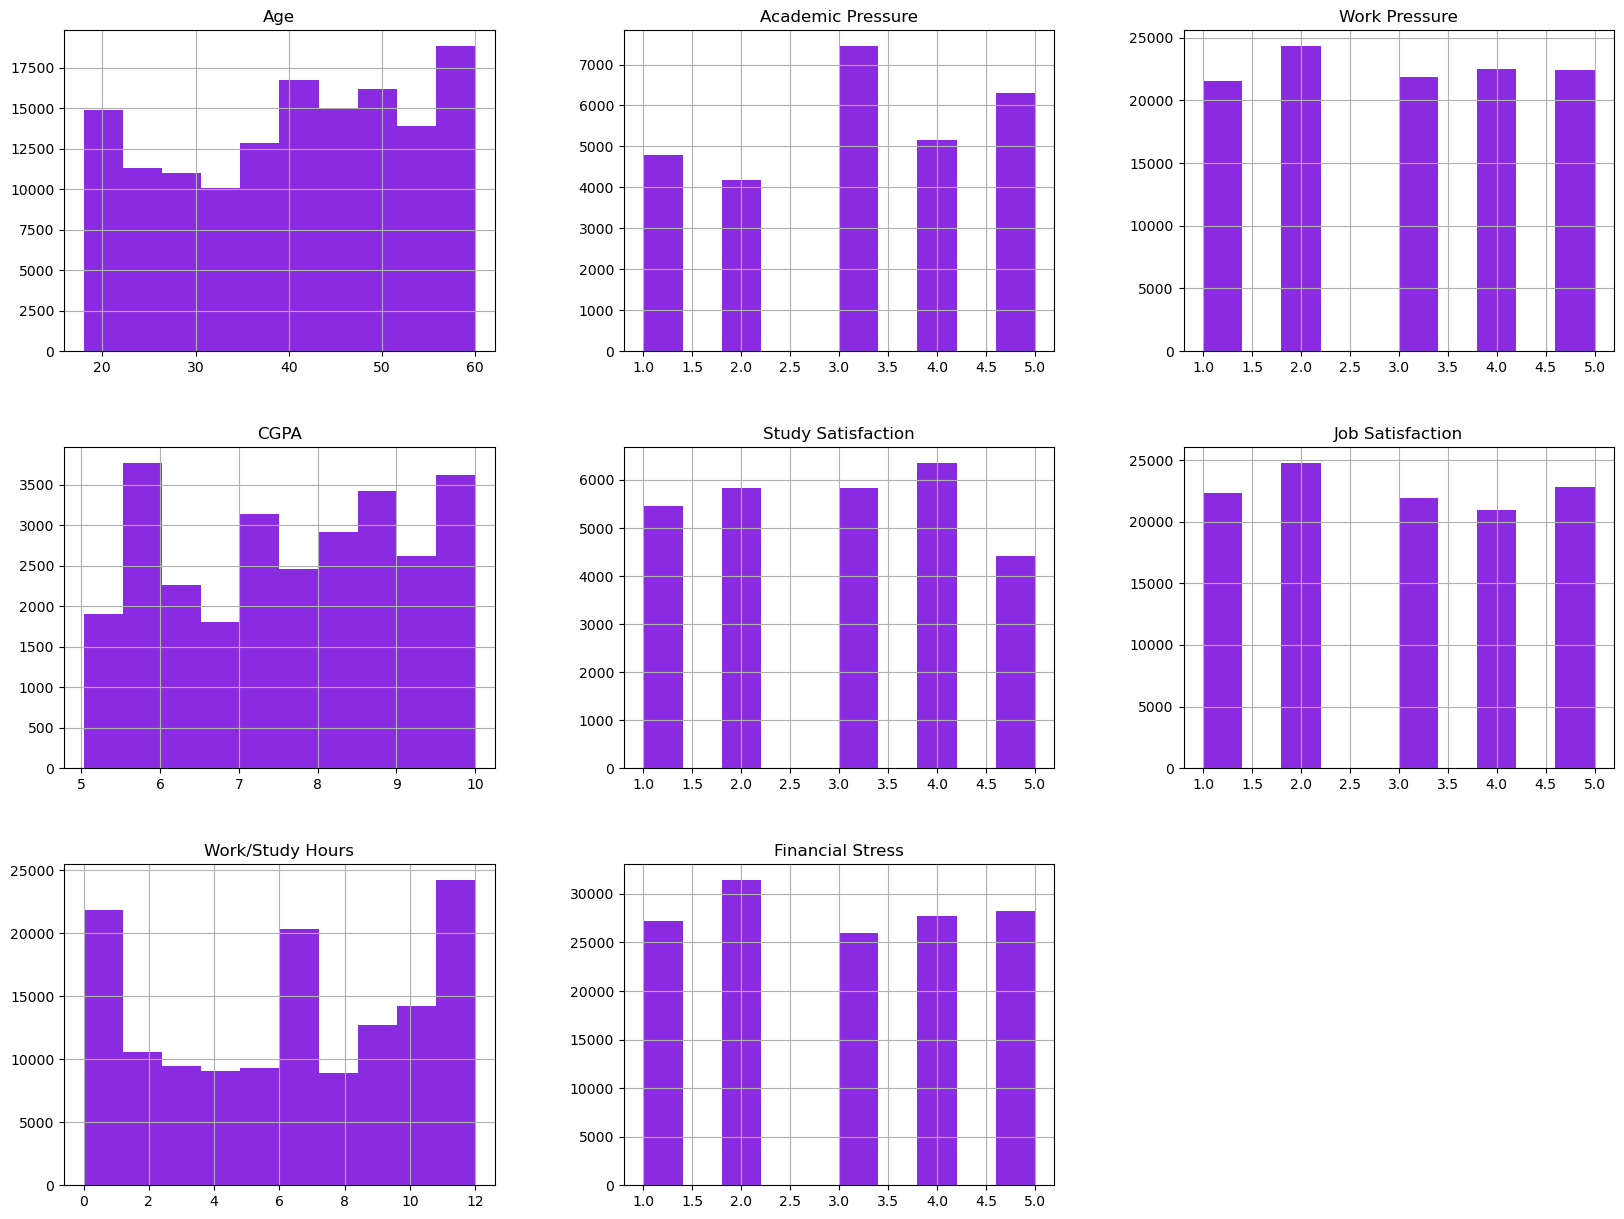

In [112]:
mental_num_cols.hist(figsize = (20,15), color='#8A2BE2')
plt.show()

In [83]:
mental_num_cols.isna().sum()

Age                        0
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Work/Study Hours           0
Financial Stress           4
dtype: int64

In [86]:
columns_to_fill = ['Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Financial Stress']

In [88]:
for col in columns_to_fill:
    if col in mental_data.columns:
        mental_data[col].fillna(mental_data[col].mean(), inplace=True)

In [90]:
mental_data.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [92]:
mental_cat_cols = mental_data.select_dtypes(include = ['object'])
mental_cat_cols

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aaradhya,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Vivan,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Yuvraj,Male,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Yuvraj,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Rhea,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,Ahmedabad,Working Professional,NaN,5-6 hours,Unhealthy,Class 12,No,Yes
140696,Lata,Female,Hyderabad,Working Professional,Content Writer,7-8 hours,Moderate,B.Tech,Yes,Yes
140697,Aanchal,Female,Kolkata,Working Professional,Marketing Manager,More than 8 hours,Moderate,B.Com,No,No
140698,Prachi,Female,Srinagar,Working Professional,Plumber,5-6 hours,Moderate,ME,Yes,No


In [94]:
mental_cat_cols.isna().sum()

Name                                         0
Gender                                       0
City                                         0
Working Professional or Student              0
Profession                               36630
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Family History of Mental Illness             0
dtype: int64

In [96]:
object_columns_to_fill = ['Profession', 'Dietary Habits', 'Degree']

In [98]:
for col in object_columns_to_fill:
    if col in mental_data.columns:
        mode_value = mental_data[col].mode().iloc[0]
        mental_data[col].fillna(mode_value, inplace=True)

In [100]:
mental_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

#### **" Successfully handled the null values. "**

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Group By
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Group by 'Working Professional or Student' and calculate average Depression rate</h3>

In [105]:
depression_work = mental_data.groupby('Working Professional or Student')['Depression'].mean()
depression_work

Working Professional or Student
Student                 0.585499
Working Professional    0.081836
Name: Depression, dtype: float64

<h3 style="font-weight: bold; color: #6A5ACD;">Group by Gender and Dietary Habits, then count</h3>

In [108]:
gender_dietary = mental_data.groupby(['Gender', 'Dietary Habits']).size()
gender_dietary

Gender  Dietary Habits   
Female  1.0                      1
        BSc                      1
        Class 12                 1
        Electrician              1
        Gender                   1
        Healthy              21138
        Indoor                   1
        M.Tech                   1
        Mihir                    1
        Moderate             22449
        No                       1
        Unhealthy            19639
        Yes                      1
Male    2                        1
        3                        1
        Healthy              23603
        Hormonal                 1
        Less Healthy             1
        Less than Healthy        1
        Male                     1
        Moderate             27260
        More Healthy             2
        No                       1
        No Healthy               1
        Pratham                  1
        Unhealthy            26588
        Vegas                    1
        Yes                  

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Exploratory Data Analysis (EDA)
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Distribution of Target Variable</h3>

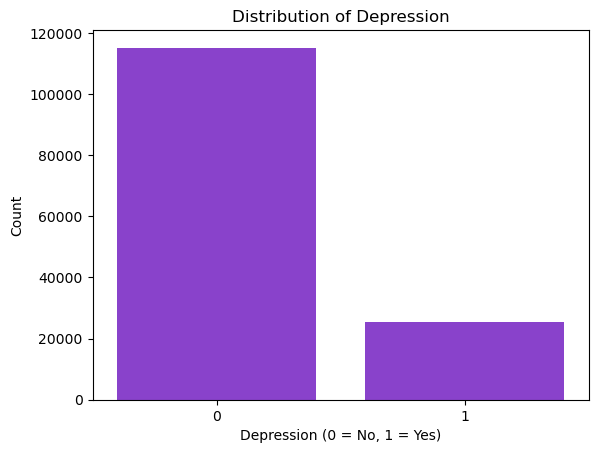

In [114]:
sns.countplot(x='Depression', data=mental_data, color='#8A2BE2') 
plt.title('Distribution of Depression')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

* Class 0 (No Depression) has a significantly higher count compared to
* Class 1 (Depression) which has a much lower count.

<h3 style="font-weight: bold; color: #6A5ACD;">Distribution of Target Variable by Gender and Dietary Habits</h3>

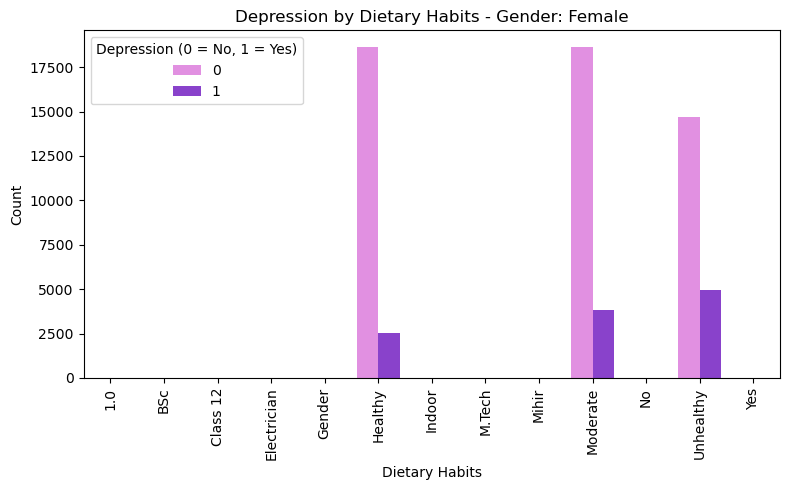

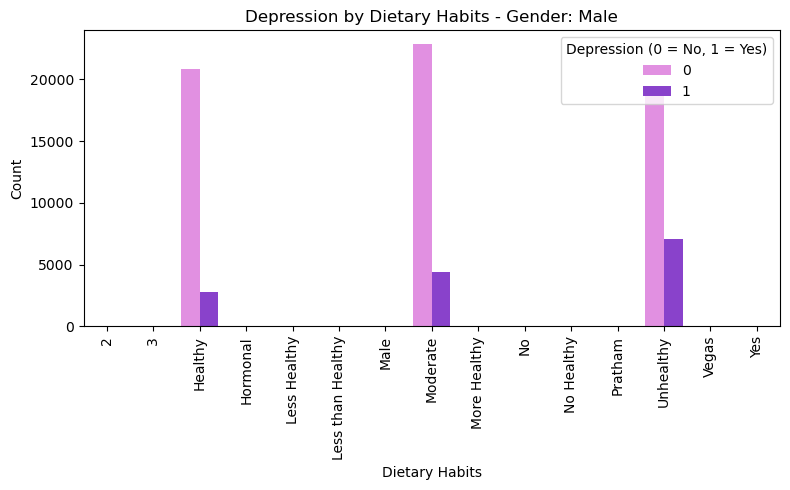

In [74]:
violet_palette = {0: 'violet', 1: '#8A2BE2'}  

grouped_data = mental_data.groupby(['Gender', 'Dietary Habits', 'Depression']).size().reset_index(name='Count')
genders = grouped_data['Gender'].unique()

for gender in genders:
    subset = grouped_data[grouped_data['Gender'] == gender]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=subset,
        x='Dietary Habits',
        y='Count',
        hue='Depression',
        palette=violet_palette
    )
    plt.title(f'Depression by Dietary Habits - Gender: {gender}')
    plt.xlabel('Dietary Habits')
    plt.ylabel('Count')
    plt.legend(title='Depression (0 = No, 1 = Yes)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Chart 1: Females – Depression by Dietary Habits**

**Healthy diet :**

* Significantly more females without depression.
* A small portion still experiences depression.

**Unhealthy diet :**

* Noticeable increase in depression cases compared to healthy/moderate diets.
* The proportion of depressed individuals is relatively higher here.

**Chart 2: Males – Depression by Dietary Habits**

**Healthy/Moderate diet :**

* Most males in this group do not show signs of depression.
* Depression exists but at a lower count.

**Unhealthy diet :**

* Higher count of males with depression compared to other diet groups.
* Clear correlation between poor diet and higher depression levels.

<h3 style="font-weight: bold; color: #6A5ACD;">Gender Distributioon and Students vs Professionals</h3>

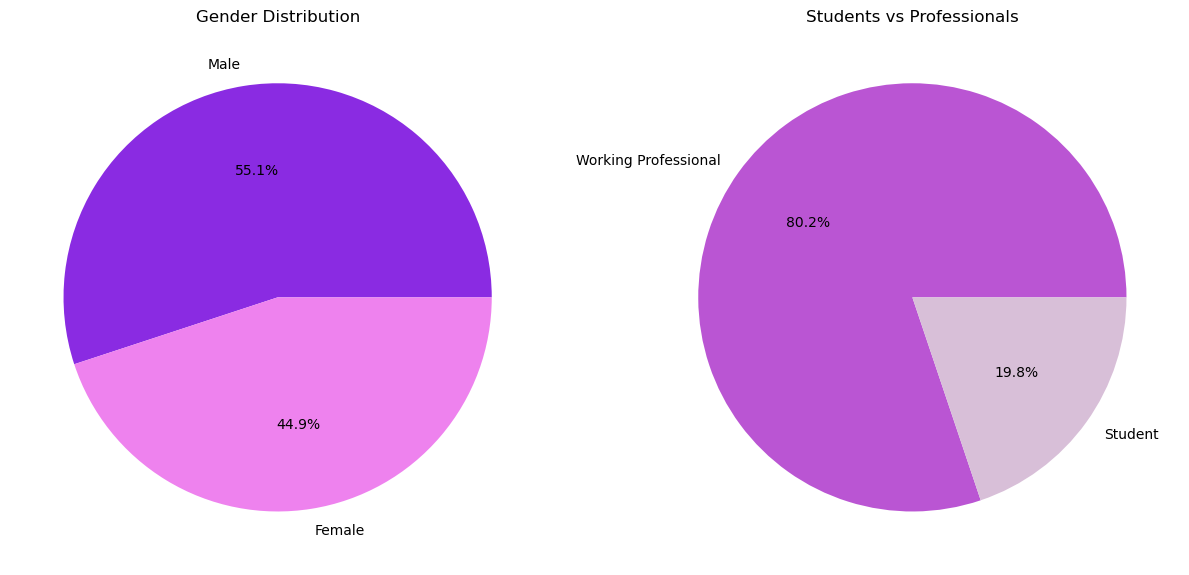

In [77]:
gender_counts = mental_data['Gender'].value_counts()
group_counts = mental_data['Working Professional or Student'].value_counts()

# Violet-themed color palettes
violet_colors1 = ['#8A2BE2', 'violet']  # e.g., Male/Female
violet_colors2 = ['#BA55D3', '#D8BFD8']  # e.g., Student/Professional

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender Pie Chart
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=violet_colors1)
axes[0].set_title('Gender Distribution')

# Group Pie Chart
axes[1].pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=violet_colors2)
axes[1].set_title('Students vs Professionals')

plt.tight_layout()
plt.show()

**Gender Distribution**

* Male: 55.1%
* Female: 44.9%
* The dataset has a slightly higher number of male participants compared to females.
* The gender split is relatively balanced, ensuring fair gender representation for model training and analysis.

**Students vs Working Professionals**

* Working Professionals: 80.2%
* Students: 19.8%
* The dataset is heavily skewed towards working professionals.
* This could influence depression-related findings, as stressors and mental health triggers differ significantly between working individuals and students.

<h3 style="font-weight: bold; color: #6A5ACD;">Correlation Heatmap</h3>

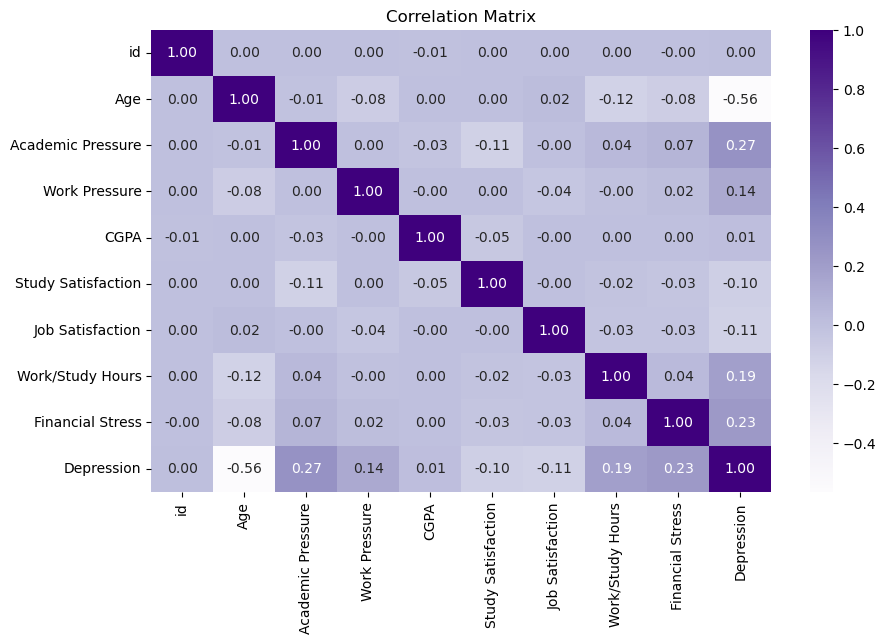

In [79]:
corr = mental_data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Positively Correlated with Depression**

* Academic Pressure → 0.27
* Financial Stress → 0.23
* Work/Study Hours → 0.19
* Work Pressure → 0.14

**Negatively Correlated with Depression**

* Age → -0.56
* Study Satisfaction → -0.10
* Job Satisfaction → -0.11

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Outlier Detection
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Checking Outliers</h3>

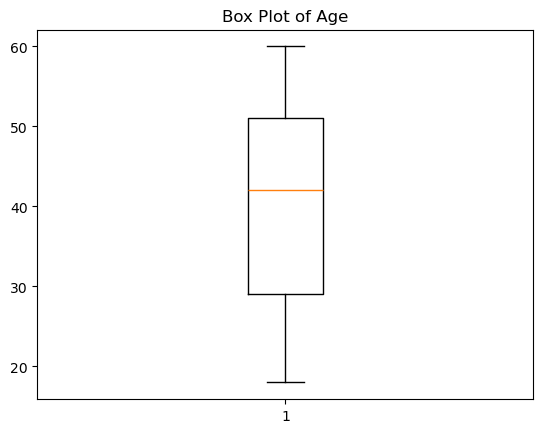

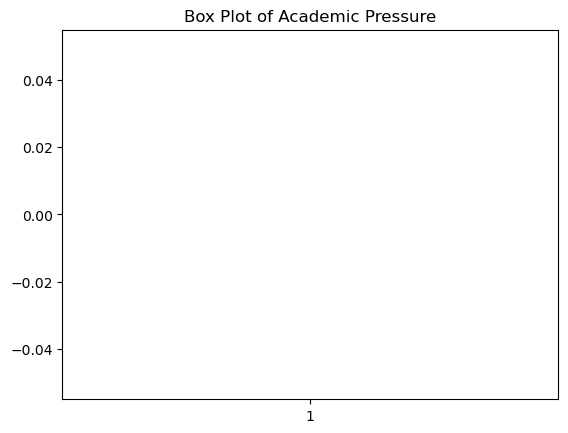

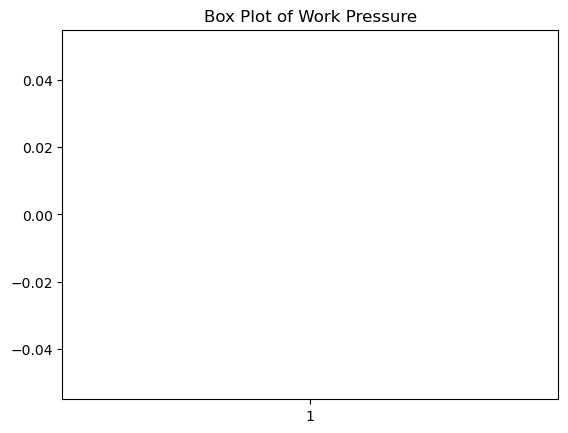

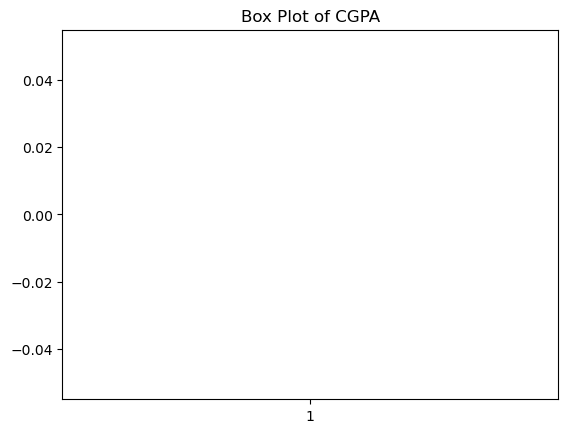

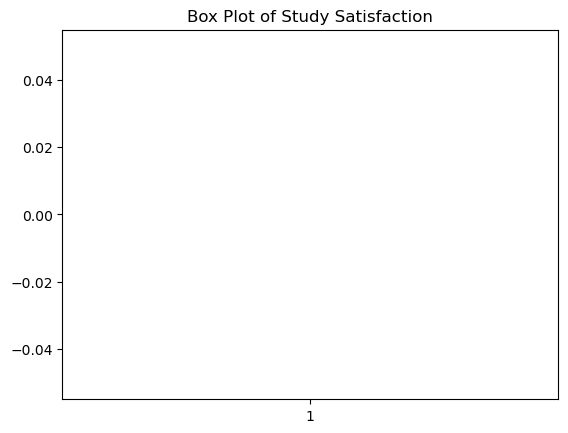

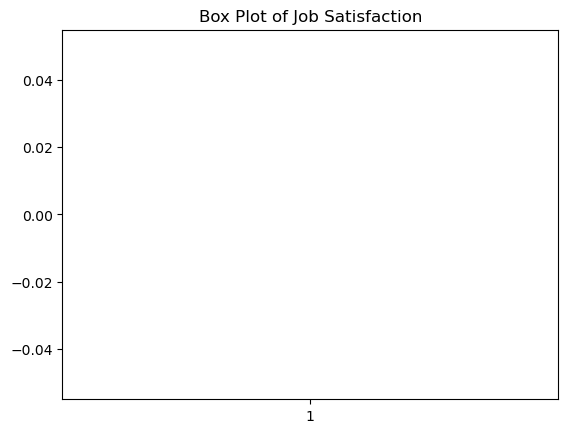

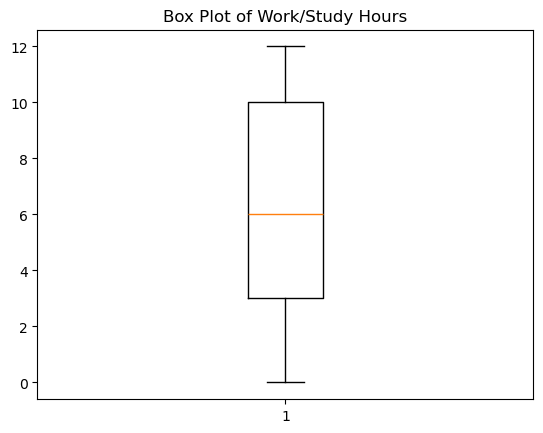

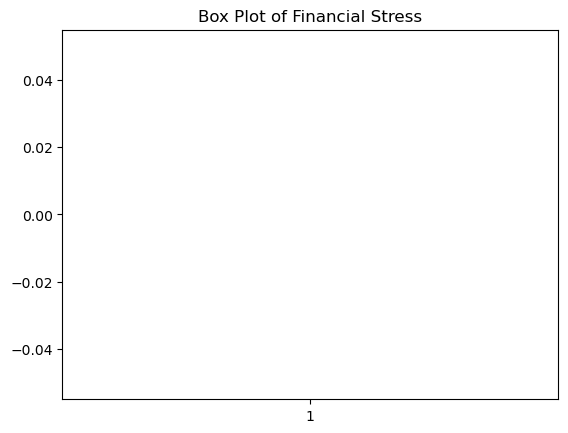

In [82]:
for i in mental_num_cols:
    plt.boxplot(mental_num_cols[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

#### **" No outliers were detected. "**

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Encoding
</div>

In [85]:
le = LabelEncoder()

In [87]:
for col in mental_data.select_dtypes(include='object').columns:
    mental_data[col] = le.fit_transform(mental_data[col])

In [89]:
mental_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,11,0,49.0,50,1,10,3.142273,5.000000,7.658636,2.94494,2.000000,29,7,33,0,1.0,2.0,0,0
1,1,407,1,26.0,93,1,55,3.142273,4.000000,7.658636,2.94494,3.000000,27,20,63,1,7.0,3.0,0,1
2,2,417,1,33.0,97,0,55,5.000000,2.998998,8.970000,2.00000,2.974404,15,7,21,1,3.0,1.0,0,1
3,3,417,1,22.0,64,1,55,3.142273,5.000000,7.658636,2.94494,1.000000,27,15,28,1,10.0,1.0,1,1
4,4,286,0,30.0,37,1,9,3.142273,1.000000,7.658636,2.94494,1.000000,15,20,28,1,9.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,398,0,18.0,4,1,55,3.142273,5.000000,7.658636,2.94494,4.000000,15,20,45,0,2.0,4.0,1,1
140696,140696,193,0,41.0,26,1,15,3.142273,5.000000,7.658636,2.94494,4.000000,19,15,24,1,6.0,5.0,1,0
140697,140697,7,0,24.0,44,1,38,3.142273,3.000000,7.658636,2.94494,1.000000,29,15,19,0,4.0,4.0,0,0
140698,140698,252,0,49.0,84,1,47,3.142273,5.000000,7.658636,2.94494,2.000000,15,15,84,1,10.0,1.0,0,0


In [91]:
pred_data = mental_data.copy()

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Feature and Target Split
</div>

In [94]:
X = mental_data.drop(columns=['Depression']) 
Y = mental_data['Depression']

In [96]:
X

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,11,0,49.0,50,1,10,3.142273,5.000000,7.658636,2.94494,2.000000,29,7,33,0,1.0,2.0,0
1,1,407,1,26.0,93,1,55,3.142273,4.000000,7.658636,2.94494,3.000000,27,20,63,1,7.0,3.0,0
2,2,417,1,33.0,97,0,55,5.000000,2.998998,8.970000,2.00000,2.974404,15,7,21,1,3.0,1.0,0
3,3,417,1,22.0,64,1,55,3.142273,5.000000,7.658636,2.94494,1.000000,27,15,28,1,10.0,1.0,1
4,4,286,0,30.0,37,1,9,3.142273,1.000000,7.658636,2.94494,1.000000,15,20,28,1,9.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,398,0,18.0,4,1,55,3.142273,5.000000,7.658636,2.94494,4.000000,15,20,45,0,2.0,4.0,1
140696,140696,193,0,41.0,26,1,15,3.142273,5.000000,7.658636,2.94494,4.000000,19,15,24,1,6.0,5.0,1
140697,140697,7,0,24.0,44,1,38,3.142273,3.000000,7.658636,2.94494,1.000000,29,15,19,0,4.0,4.0,0
140698,140698,252,0,49.0,84,1,47,3.142273,5.000000,7.658636,2.94494,2.000000,15,15,84,1,10.0,1.0,0


In [98]:
Y

0         0
1         1
2         1
3         1
4         0
         ..
140695    1
140696    0
140697    0
140698    0
140699    1
Name: Depression, Length: 140700, dtype: int64

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Scaling
</div>

In [101]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [103]:
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)
scaled_df['Depression'] = Y.reset_index(drop=True)

In [105]:
scaled_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,-1.732038,-1.624337,-1.106796,0.695360,-0.072046,0.497344,-1.531798,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,1.136687,-1.347199,-0.623342,-0.988861,-1.363057,-0.699617,-0.994217,0
1,-1.732014,1.562194,0.903508,-1.161867,1.363522,0.497344,0.885667,7.224761e-16,0.795334,2.724076e-15,1.466474e-15,2.018844e-02,0.780660,1.120101,0.486356,1.011265,0.193928,0.007793,-0.994217,1
2,-1.731989,1.642662,0.903508,-0.596624,1.497063,-2.010679,0.885667,3.022283e+00,0.000000,2.011000e+00,-1.560194e+00,-3.502650e-16,-1.355504,-1.347199,-1.067221,1.011265,-0.844062,-1.407026,-0.994217,1
3,-1.731965,1.642662,0.903508,-1.484863,0.395348,0.497344,0.885667,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-1.557265e+00,0.780660,0.171140,-0.808291,1.011265,0.972421,-1.407026,1.005816,1
4,-1.731940,0.588532,-1.106796,-0.838871,-0.506054,0.497344,-1.585519,7.224761e-16,-1.588279,2.724076e-15,1.466474e-15,-1.557265e+00,-1.355504,1.120101,-0.808291,1.011265,0.712923,0.715203,1.005816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,1.731940,1.489773,-1.106796,-1.807859,-1.607769,0.497344,0.885667,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-1.355504,1.120101,-0.179463,-0.988861,-1.103560,0.715203,1.005816,1
140696,1.731965,-0.159820,-1.106796,0.049368,-0.873292,0.497344,-1.263190,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,8.089152e-01,-0.643449,0.171140,-0.956251,1.011265,-0.065570,1.422613,1.005816,0
140697,1.731989,-1.656524,-1.106796,-1.323365,-0.272357,0.497344,-0.027597,7.224761e-16,0.000796,2.724076e-15,1.466474e-15,-1.557265e+00,1.136687,0.171140,-1.141201,-0.988861,-0.584565,0.715203,-0.994217,0
140698,1.732014,0.314941,-1.106796,0.695360,1.063054,0.497344,0.455896,7.224761e-16,1.589872,2.724076e-15,1.466474e-15,-7.685383e-01,-1.355504,0.171140,1.263144,1.011265,0.972421,-1.407026,-0.994217,0


<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Train-Test-Split
</div>

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Model Building
</div>

<h3 style="font-weight: bold; color: #6A5ACD;">Model Initialization</h3>

In [111]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "GaussianNB": GaussianNB(),
    "MultinomialNB" : MultinomialNB()
}

<h3 style="font-weight: bold; color: #6A5ACD;">Model Training</h3>

In [113]:
results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred, average='weighted', zero_division=0)
    rec = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    cm = confusion_matrix(Y_test, Y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213


In [115]:
results_df = pd.DataFrame(results)

In [117]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Logistic Regression,0.892431,0.888855,0.892431,0.890198,"[[21730, 1256], [1771, 3383]]"
1,Decision Tree,0.903056,0.903548,0.903056,0.903295,"[[21589, 1397], [1331, 3823]]"
2,Random Forest,0.936141,0.934928,0.936141,0.935346,"[[22246, 740], [1057, 4097]]"
3,Gradient Boosting,0.938308,0.937354,0.938308,0.937719,"[[22241, 745], [991, 4163]]"
4,Support Vector Machine,0.816844,0.667235,0.816844,0.734498,"[[22986, 0], [5154, 0]]"
5,LightGBM,0.938699,0.938178,0.938699,0.938411,"[[22185, 801], [924, 4230]]"
6,CatBoost,0.939552,0.938865,0.939552,0.939154,"[[22221, 765], [936, 4218]]"
7,XGBoost,0.937846,0.937286,0.937846,0.937535,"[[22177, 809], [940, 4214]]"
8,GaussianNB,0.886070,0.896962,0.886070,0.889985,"[[20861, 2125], [1081, 4073]]"
9,MultinomialNB,0.747903,0.824193,0.747903,0.771388,"[[17396, 5590], [1504, 3650]]"


<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Model Evaluation
</div>

In [120]:
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

In [122]:
results_df_sorted

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,CatBoost,0.939552,0.938865,0.939552,0.939154,"[[22221, 765], [936, 4218]]"
1,LightGBM,0.938699,0.938178,0.938699,0.938411,"[[22185, 801], [924, 4230]]"
2,Gradient Boosting,0.938308,0.937354,0.938308,0.937719,"[[22241, 745], [991, 4163]]"
3,XGBoost,0.937846,0.937286,0.937846,0.937535,"[[22177, 809], [940, 4214]]"
4,Random Forest,0.936141,0.934928,0.936141,0.935346,"[[22246, 740], [1057, 4097]]"
5,Decision Tree,0.903056,0.903548,0.903056,0.903295,"[[21589, 1397], [1331, 3823]]"
6,Logistic Regression,0.892431,0.888855,0.892431,0.890198,"[[21730, 1256], [1771, 3383]]"
7,GaussianNB,0.886070,0.896962,0.886070,0.889985,"[[20861, 2125], [1081, 4073]]"
8,Support Vector Machine,0.816844,0.667235,0.816844,0.734498,"[[22986, 0], [5154, 0]]"
9,MultinomialNB,0.747903,0.824193,0.747903,0.771388,"[[17396, 5590], [1504, 3650]]"


<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Model Performance Comparison
</div>

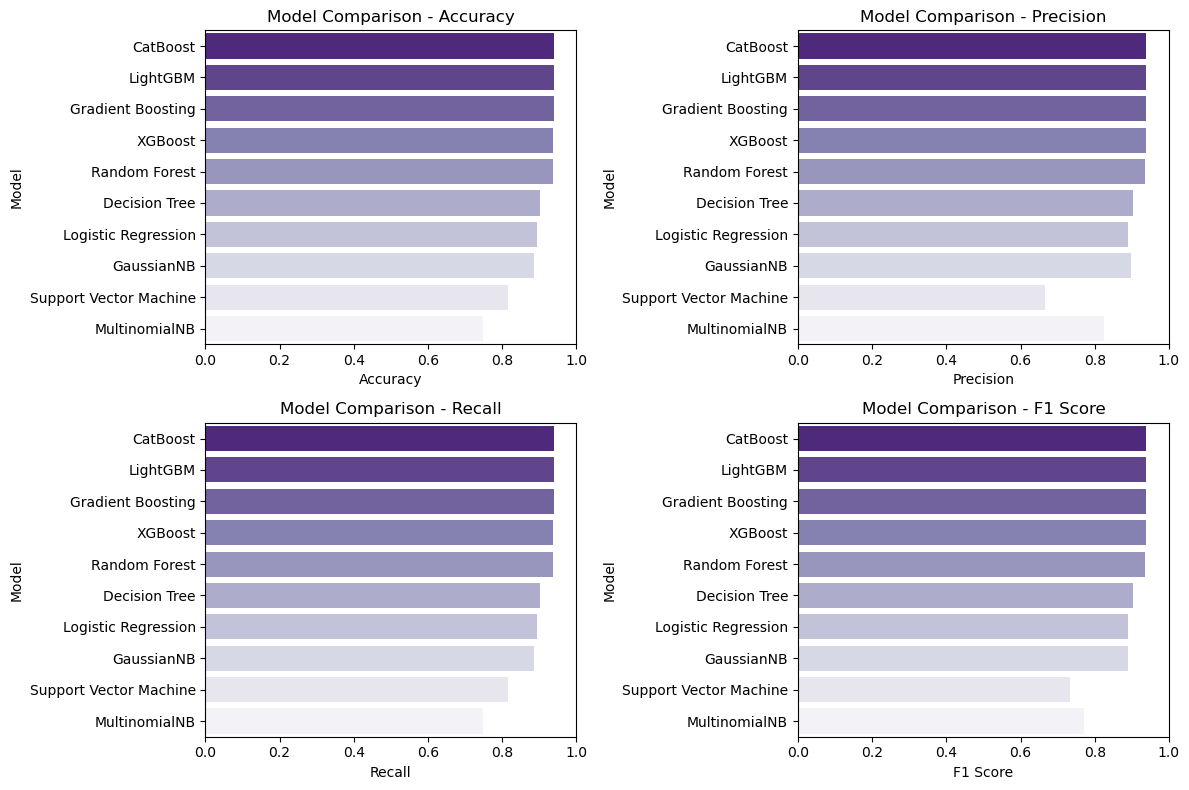

In [125]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=results_df_sorted, x=metric, y='Model', palette='Purples_r')
    plt.title(f'Model Comparison - {metric}')
    plt.xlim(0, 1)  

plt.tight_layout()
plt.show()

<style>
    table {
        border-collapse: collapse;
        width: 100%;
        font-family: Arial, sans-serif;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: center;
    }
    th {
        background-color: #444;
        color: white;
    }
    tr:nth-child(even){background-color: #f2f2f2;}
    tr:hover {background-color: #ddd;}
    .highlight {
        font-weight: bold;
        background-color: #d1e7dd;
        color: #0f5132;
    }
</style>

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1 Score</th>
        <th>Remarks</th>
    </tr>
    <tr class="highlight">
        <td><b>CatBoost</b></td>
        <td><b>93.96%</b></td>
        <td><b>0.9389</b></td>
        <td><b>0.9396</b></td>
        <td><b>0.9392</b></td>
        <td><b>Best Overall Model</b> – top in all metrics</td>
    </tr>
    <tr>
        <td>LightGBM</td>
        <td>93.87%</td>
        <td>0.9382</td>
        <td>0.9387</td>
        <td>0.9384</td>
        <td>Excellent performance, very efficient</td>
    </tr>
    <tr>
        <td>Gradient Boosting</td>
        <td>93.83%</td>
        <td>0.9374</td>
        <td>0.9383</td>
        <td>0.9378</td>
        <td>Strong, consistent results</td>
    </tr>
    <tr>
        <td>XGBoost</td>
        <td>93.78%</td>
        <td>0.9373</td>
        <td>0.9378</td>
        <td>0.9375</td>
        <td>Reliable tree-based boosting model</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>93.61%</td>
        <td>0.9349</td>
        <td>0.9361</td>
        <td>0.9353</td>
        <td>Good performance with interpretability</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>90.31%</td>
        <td>0.9035</td>
        <td>0.9031</td>
        <td>0.9030</td>
        <td>Simple and interpretable</td>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>89.24%</td>
        <td>0.8889</td>
        <td>0.8924</td>
        <td>0.8902</td>
        <td>Fast and baseline linear model</td>
    </tr>
    <tr>
        <td>GaussianNB</td>
        <td>88.61%</td>
        <td>0.8970</td>
        <td>0.8861</td>
        <td>0.8899</td>
        <td>Works well with small, clean data</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>81.68%</td>
        <td>0.6672</td>
        <td>0.8168</td>
        <td>0.7345</td>
        <td>Low precision – poor balance</td>
    </tr>
    <tr>
        <td>MultinomialNB</td>
        <td>74.79%</td>
        <td>0.8242</td>
        <td>0.7479</td>
        <td>0.7714</td>
        <td>Weakest performer</td>
    </tr>
</table>

<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Prediction
</div>

In [128]:
pred_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,11,0,49.0,50,1,10,3.142273,5.000000,7.658636,2.94494,2.000000,29,7,33,0,1.0,2.0,0,0
1,1,407,1,26.0,93,1,55,3.142273,4.000000,7.658636,2.94494,3.000000,27,20,63,1,7.0,3.0,0,1
2,2,417,1,33.0,97,0,55,5.000000,2.998998,8.970000,2.00000,2.974404,15,7,21,1,3.0,1.0,0,1
3,3,417,1,22.0,64,1,55,3.142273,5.000000,7.658636,2.94494,1.000000,27,15,28,1,10.0,1.0,1,1
4,4,286,0,30.0,37,1,9,3.142273,1.000000,7.658636,2.94494,1.000000,15,20,28,1,9.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,398,0,18.0,4,1,55,3.142273,5.000000,7.658636,2.94494,4.000000,15,20,45,0,2.0,4.0,1,1
140696,140696,193,0,41.0,26,1,15,3.142273,5.000000,7.658636,2.94494,4.000000,19,15,24,1,6.0,5.0,1,0
140697,140697,7,0,24.0,44,1,38,3.142273,3.000000,7.658636,2.94494,1.000000,29,15,19,0,4.0,4.0,0,0
140698,140698,252,0,49.0,84,1,47,3.142273,5.000000,7.658636,2.94494,2.000000,15,15,84,1,10.0,1.0,0,0


In [130]:
pred_data.sample(8)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
81635,81635,18,1,39.0,26,1,15,3.142273,2.000000,7.658636,2.94494,3.000000,15,7,79,1,5.0,4.0,0,0
72320,72320,227,1,18.0,93,0,55,1.000000,2.998998,8.900000,5.00000,2.974404,27,15,45,1,12.0,2.0,0,1
23494,23494,294,1,35.0,11,1,17,3.142273,5.000000,7.658636,2.94494,3.000000,29,7,29,1,0.0,4.0,0,0
111087,111087,71,0,41.0,65,1,55,3.142273,3.000000,7.658636,2.94494,5.000000,15,15,67,0,1.0,4.0,0,0
85063,85063,383,0,60.0,50,1,14,3.142273,5.000000,7.658636,2.94494,1.000000,15,7,80,0,1.0,4.0,0,0
134202,134202,107,1,49.0,64,1,20,3.142273,5.000000,7.658636,2.94494,5.000000,19,20,21,1,7.0,2.0,0,0
39381,39381,294,1,50.0,93,1,55,3.142273,1.000000,7.658636,2.94494,4.000000,19,15,17,1,7.0,3.0,0,0
12163,12163,304,1,36.0,14,1,55,3.142273,5.000000,7.658636,2.94494,4.000000,15,15,25,0,7.0,2.0,1,0


In [136]:
pred_sample_data = [[81635,18,1,39.0,26,1,15,3.142273,2.000000,7.658636,2.94494,3.000000,15,7,79,1,5.0,4.0,0]]

In [138]:
pred_sample_data_scaled = scaler.transform(pred_sample_data)

In [142]:
catboost_model = models["CatBoost"]

In [144]:
prediction = catboost_model.predict(pred_sample_data_scaled)

In [146]:
print("Final Prediction : ",prediction)

Final Prediction :  [0]


<div style="color: white; background-color: #c7b8ea; font-size: 28px; font-weight: bold; text-align: center; padding: 10px 20px; border-radius: 20px;">
  Conclusion
</div>

* Successfully built and evaluated machine learning models to predict mental health conditions using demographic and survey-based data.
* CatBoost Classifier delivered the highest performance across all metrics.
* Proper data preprocessing (handling null values, encoding categorical data, scaling) is essential for model success.
* Ensemble models (CatBoost, LightGBM) perform better for complex, non-linear datasets.
* Evaluation with multiple metrics gives a balanced view of model performance.